In [ ]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['check.csv']))

Saving check.csv to check.csv


**Categorizing the target varible**

Here we are categorizing the target variable in such a way that IMDB score between 1 and 3 is FLOP , between 3 and 6 is AVG, between 6 and 10 is HIT.

And we are using binning in pandas to acheive this.

In [ ]:
#Categorising the target varible
bins = [ 1, 3, 6, 10]
labels = ['FLOP', 'AVG', 'HIT']
data['imdb_binned'] = pd.cut(data['imdb_score'], bins=bins, labels=labels)

Text(0.5, 1.0, 'Categorization of Movies')

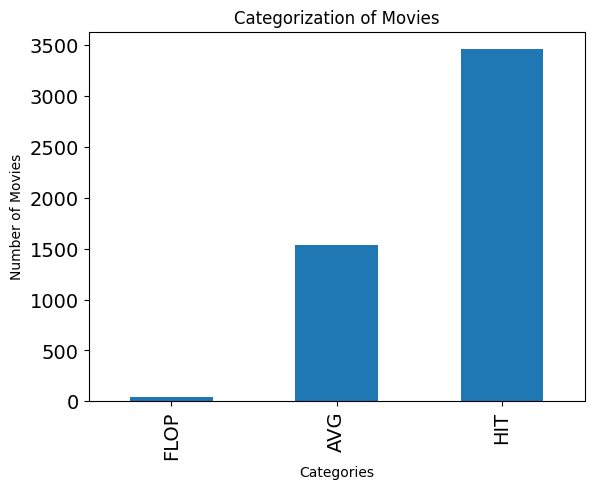

In [ ]:
data.groupby(['imdb_binned']).size().plot(kind="bar",fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Number of Movies')
plt.title('Categorization of Movies')

We can see a new column named imdb_binned correctly categorising the imdb score

In [ ]:
#Checking the new column
data.head(5)

,movie_title,director_name,title_year,facenumber_in_poster,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,...,cast_total_facebook_likes,imdb_score,num_voted_users,language,country,color,aspect_ratio,content_rating,movie_imdb_link,imdb_binned
0,Avatar,James Cameron,2009.0,0,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,...,4834,7.9,886204,English,USA,Color,1.78,PG-13,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,HIT
1,Pirates of the Caribbean: At World's End,Gore Verbinski,2007.0,0,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,...,48350,7.1,471220,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,HIT
2,Spectre,Sam Mendes,2015.0,1,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,...,11700,6.8,275868,English,UK,Color,2.35,PG-13,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,HIT
3,The Dark Knight Rises,Christopher Nolan,2012.0,0,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,...,106759,8.5,1144337,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,HIT
4,Star Wars: Episode VII - The Force Awakens ...,Doug Walker,NaN,0,131.0,Doug Walker,131.0,Rob Walker,12.0,NaN,...,143,7.1,8,NaN,NaN,Color,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,HIT


Our dataset contains 5043 samples(rows) and 28 variables(columns)

In [ ]:
#Shape of the dataset
data.shape

(5043, 29)

**Handling the Missing values**
Every datset have some missing values, we have to find out in which cloumns they are

In [ ]:
#Total null values present in each column
data.isnull().sum()

movie_title                    0
director_name                104
title_year                   108
facenumber_in_poster           0
director_facebook_likes      104
actor_1_name                   7
actor_1_facebook_likes         7
actor_2_name                  13
actor_2_facebook_likes        13
actor_3_name                  23
actor_3_facebook_likes        23
duration                      15
genres                         0
plot_keywords                153
budget                       492
gross                        884
num_critic_for_reviews        50
num_user_for_reviews          21
movie_facebook_likes           0
cast_total_facebook_likes      0
imdb_score                     0
num_voted_users                0
language                       4
country                        2
color                          0
aspect_ratio                 329
content_rating               303
movie_imdb_link                0
imdb_binned                    0
dtype: int64

Dropping all the samples that having missing *values*

In [ ]:
#Droping the samples that have missing values
data.dropna(inplace=True)

Total samples remaining after dropping missing values

In [ ]:
#Final shape of the data after Droping missing values
data.shape

(3763, 29)

In [ ]:
#List of variables in the datset
data.columns

Index(['movie_title', 'director_name', 'title_year', 'facenumber_in_poster',
       'director_facebook_likes', 'actor_1_name', 'actor_1_facebook_likes',
       'actor_2_name', 'actor_2_facebook_likes', 'actor_3_name',
       'actor_3_facebook_likes', 'duration', 'genres', 'plot_keywords',
       'budget', 'gross', 'num_critic_for_reviews', 'num_user_for_reviews',
       'movie_facebook_likes', 'cast_total_facebook_likes', 'imdb_score',
       'num_voted_users', 'language', 'country', 'color', 'aspect_ratio',
       'content_rating', 'movie_imdb_link', 'imdb_binned'],
      dtype='object')

In [ ]:
data.shape

(3763, 29)

In [ ]:
#Describing the categorical data
data.describe(include='object')

,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,genres,plot_keywords,language,country,color,content_rating,movie_imdb_link
count,3763,3763,3763,3763,3763,3763,3763,3763,3763,3763,3763,3763
unique,3662,1659,1431,2193,2588,746,3663,33,45,2,12,3663
top,Victor Frankenstein,Steven Spielberg,Robert De Niro,Morgan Freeman,Steve Coogan,Comedy|Drama|Romance,1940s|child hero|fantasy world|orphan|referenc...,English,USA,Color,R,http://www.imdb.com/title/tt3332064/?ref_=fn_t...
freq,3,25,42,20,8,147,3,3606,2993,3639,1701,3


In [ ]:
#Dropping 2 columns
data.drop(columns=['movie_title','movie_imdb_link'],inplace=True)

**Label Encoding**

All the categorical columns and the columns with text data are being Label Encodeded in this step.

In [ ]:
#Label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['color', 'director_name', 'actor_2_name',
        'genres', 'actor_1_name',
        'actor_3_name',
        'plot_keywords',
        'language', 'country', 'content_rating',
       'title_year', 'aspect_ratio']
data[cat_list]=data[cat_list].apply(lambda x:le.fit_transform(x))

In [ ]:
#A sample of data after label encoding
data.head()

,director_name,title_year,facenumber_in_poster,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,...,movie_facebook_likes,cast_total_facebook_likes,imdb_score,num_voted_users,language,country,color,aspect_ratio,content_rating,imdb_binned
0,621,66,0,0.0,189,1000.0,1002,936.0,2530,855.0,...,33000,4834,7.9,886204,9,43,1,7,7,HIT
1,539,64,0,563.0,687,40000.0,1593,5000.0,1001,1000.0,...,0,48350,7.1,471220,9,43,1,12,7,HIT
2,1395,72,1,0.0,258,11000.0,1797,393.0,2297,161.0,...,85000,11700,6.8,275868,9,42,1,12,7,HIT
3,252,69,0,22000.0,1343,27000.0,380,23000.0,1268,23000.0,...,164000,106759,8.5,1144337,9,43,1,12,7,HIT
5,63,69,1,475.0,322,640.0,1840,632.0,1969,530.0,...,24000,1873,6.6,212204,9,43,1,12,7,HIT


In [ ]:
#Removing few columns due to multicollinearity
data.drop(columns=['cast_total_facebook_likes','num_critic_for_reviews'],inplace=True)

In [ ]:
#Removing the column "imdb_score" since we have "imdb_binned"
data.drop(columns=['imdb_score'],inplace=True)

In [ ]:
data.shape

(3763, 24)

**3 CLASSIFICATION MODEL BUILDING**

Splitting the data into X and y where X contains Indepentent variables and y contain Target/Dependent variable.

In [ ]:
#Independent Variables
X = data.iloc[:, 0:23].values
#Dependent/Target Variable
y = data.iloc[:, 23].values
y

['HIT', 'HIT', 'HIT', 'HIT', 'HIT', ..., 'HIT', 'HIT', 'HIT', 'HIT', 'HIT']
Length: 3763
Categories (3, object): ['FLOP' < 'AVG' < 'HIT']

**3 Train Test Split**

We need data not only to train our model but also to test our model. So splitting the dataset into 70:30 (Train:Test) ratio.We have a predefined a function in Sklearn library called test_train_split, lets use that.

In [ ]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,stratify = y)
print(X_train.shape)
print(y_train.shape)

(2634, 23)
(2634,)


**Scaling**
Few variables will be in the range of Millions and some in Tens, we ahve to bring all of them into same scale

In [ ]:
#Scaling the dependent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Performing Recursive Feauture Elimation with Cross Validation
#Using Random forest for RFE-CV and logloss as scoring
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
clf_rf=RandomForestClassifier(random_state=0)
rfecv=RFECV(estimator=clf_rf, step=1,cv=5,scoring='neg_log_loss')
rfecv=rfecv.fit(X_train,y_train)

In [ ]:
#Optimal number of features
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 6
Best features : Index([10, 11, 13, 14, 15, 17], dtype='int64')


In [ ]:
#Feauture Ranking
clf_rf = clf_rf.fit(X_train,y_train)
importances = clf_rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

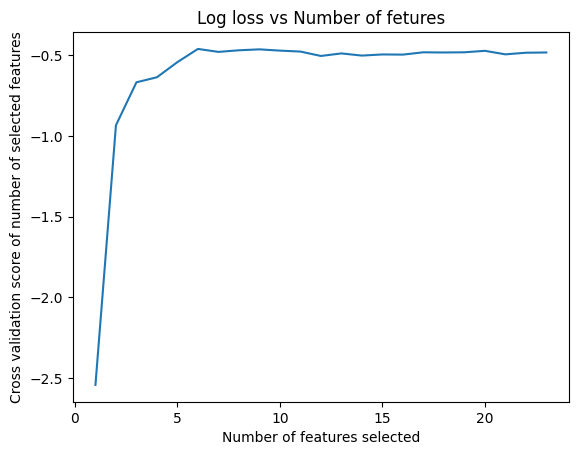

In [ ]:
#Logloss vs Number of features
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.title("Log loss vs Number of fetures")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [ ]:
#Selecting the Important Features
X_opt = X_train.iloc[:,X_train.columns[rfecv.support_]]
X_test = X_test.iloc[:,X_test.columns[rfecv.support_]]

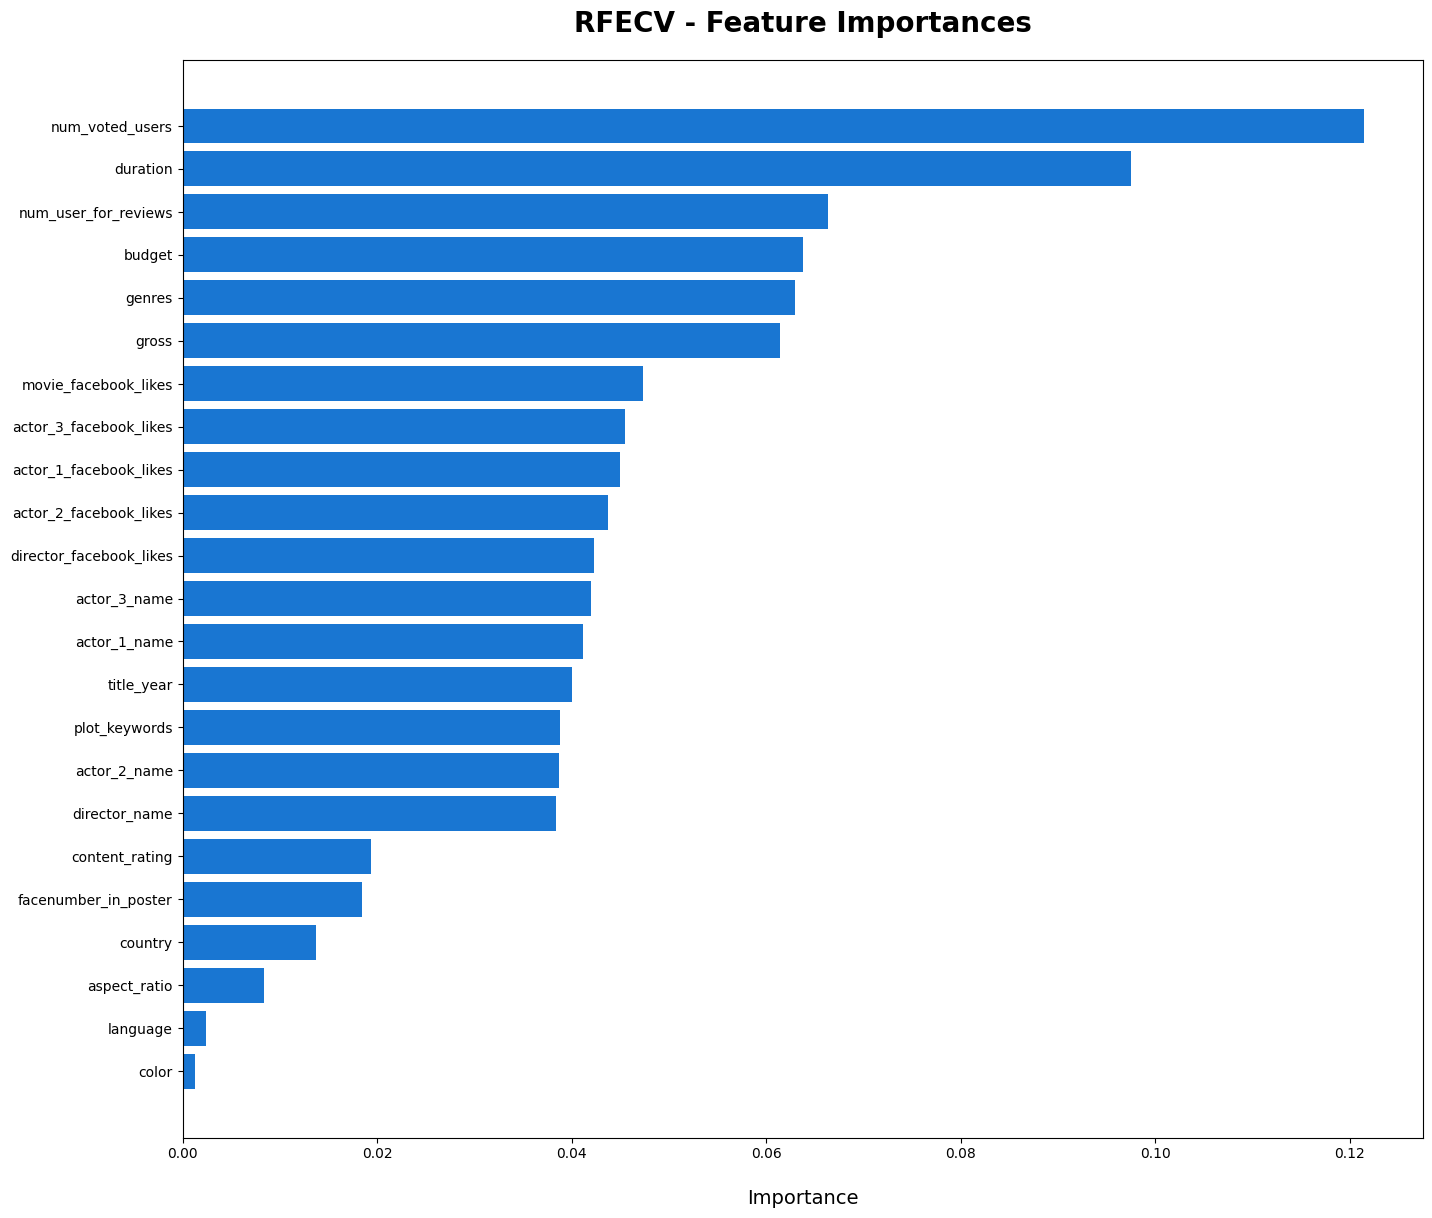

In [ ]:
#Creating anew dataframe with column names and feature importance
dset = pd.DataFrame()
data1 = data
data1.drop(columns=['imdb_binned'],inplace=True)
dset['attr'] = data1.columns

dset['importance'] = clf_rf.feature_importances_
#Sorting with importance column
dset = dset.sort_values(by='importance', ascending=True)

#Barplot indicating Feature Importance
plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()


In [ ]:
#Training the Random Forest Classifer on Train data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_opt, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the target variable
y_pred = classifier.predict(X_test)

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[202,   0, 134],
       [  3,   0,   5],
       [ 86,   0, 699]])

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         AVG       0.69      0.60      0.64       336
        FLOP       0.00      0.00      0.00         8
         HIT       0.83      0.89      0.86       785

    accuracy                           0.80      1129
   macro avg       0.51      0.50      0.50      1129
weighted avg       0.79      0.80      0.79      1129



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming y_test and y_pred are defined earlier
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.80
